In [1]:
import sqlite3
conn = sqlite3.connect("ecommerce.db")
cursor =conn.cursor()
print("sqlite database created and connected successfully")

sqlite database created and connected successfully


In [3]:
cursor.execute(""" 
CREATE TABLE IF NOT EXISTS transactions(
Inoice_no TEXT,
Stock_code TEXT,
Description TEXT,
Quantity INTEGER,
Unit_price REAL,
Customer_id INTEGER,
Country TEXT
)
""")
conn.commit()
print("table created successfully")

table created successfully


In [7]:
!pip install pandas openpyxl


In [11]:
import pandas as pd 
df = pd.read_excel(r"C:\Users\yoges\Downloads\Online Retail.xlsx",engine="openpyxl")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [23]:
# Connect to SQLite (or create a new database)
conn = sqlite3.connect("ecommerce.db")
cursor = conn.cursor()

# Store DataFrame into SQLite
df.to_sql("transactions", conn, if_exists="replace", index=False)

print("Excel data successfully imported into SQLite!")


Excel data successfully imported into SQLite!


In [25]:
# Read data from SQLite
df_sql = pd.read_sql("SELECT * FROM transactions LIMIT 5;", conn)
print(df_sql)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [29]:
query= "select name from sqlite_master where type ='table';"
cursor.execute (query)
tables = cursor.fetchall()
print("tables in database :",tables)

tables in database : [('transactions',)]


In [33]:
df_count = pd.read_sql ("select count(*) as total_transaction from transactions;",conn)
print(df_count)

   total_transaction
0             541909


In [39]:
df_customers = pd.read_sql("select count(distinct CustomerID) as unique_customer from transactions;",conn)
print(df_customers)

   unique_customer
0             4372


In [43]:
df_revenue = pd.read_sql(""" select Country,sum(Quantity*UnitPrice) as revenue
from transactions
group by Country
order by revenue desc
limit 10;""",conn)
print(df_revenue)

          Country      revenue
0  United Kingdom  8187806.364
1     Netherlands   284661.540
2            EIRE   263276.820
3         Germany   221698.210
4          France   197403.900
5       Australia   137077.270
6     Switzerland    56385.350
7           Spain    54774.580
8         Belgium    40910.960
9          Sweden    36595.910


In [45]:
df_best_product = pd.read_sql(""" select Description, sum(Quantity) as Total_quantity_sold
from transactions
group by Description 
order by Total_quantity_sold desc
limit 5;""", conn)
print(df_best_product)

                         Description  Total_quantity_sold
0  WORLD WAR 2 GLIDERS ASSTD DESIGNS                53847
1            JUMBO BAG RED RETROSPOT                47363
2      ASSORTED COLOUR BIRD ORNAMENT                36381
3                     POPCORN HOLDER                36334
4    PACK OF 72 RETROSPOT CAKE CASES                36039


In [47]:
df_top_customer = pd.read_sql(""" select CustomerId, sum (Quantity*UnitPrice) as totalspent
from transactions
group by CustomerID
order by totalspent desc
limit 5;""",conn)
print(df_top_customer)

   CustomerID  totalspent
0         NaN  1447682.12
1     14646.0   279489.02
2     18102.0   256438.49
3     17450.0   187482.17
4     14911.0   132572.62


In [51]:
df_missing=pd.read_sql("select*from transactions where CustomerID IS NULL or Description IS NULL;",conn)
print(df_missing)

       InvoiceNo StockCode                      Description  Quantity  \
0         536414     22139                             None        56   
1         536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
2         536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
3         536544     21786               POLKADOT RAIN HAT          4   
4         536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
135075    581498    85099B          JUMBO BAG RED RETROSPOT         5   
135076    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
135077    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
135078    581498     85174                S/4 CACTI CANDLES         1   
135079    581498       DOT                   DOTCOM POSTAGE         1   

                InvoiceDate  UnitPrice CustomerID         Country  
0       2010-12-01 11:52:00       0.00       None  Unit

In [53]:
cursor.execute ("delete from transactions where CustomerID IS NULL;")
conn.commit()
df_check = pd.read_sql("select count(*) from transactions where CustomerID IS NULL;",conn)
print(df_check)

   count(*)
0         0


In [55]:
df_duplicates = pd.read_sql (""" SELECT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, COUNT(*) 
    FROM transactions 
    GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
    HAVING COUNT(*) > 1;
""", conn)
print(" duplicates transactions found :",df_duplicates.shape[0])

 duplicates transactions found : 4837


In [57]:
cursor.execute(""" delete from transactions 
where rowid NOT IN( select min(rowid)
from transactions group by InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerId,Country);""")
conn.commit()
print("duplicates removed successfully")

duplicates removed successfully


In [59]:
df_negative = pd.read_sql("select*from transactions where Quantity <= 0 or UnitPrice <=0;",conn)
print(df_negative.shape)

(8912, 8)


In [63]:
cursor.execute("delete from transactions where Quantity <=0 or UnitPrice <= 0;")
conn.commit()
print("negative or zero values removed!")

negative or zero values removed!


In [65]:
df_cleaned = pd.read_sql ("select count(*) as cleaned_rows from transactions;",conn)
print(df_cleaned)

   cleaned_rows
0        392692


In [75]:
df_rfm = pd.read_sql("""
    WITH Recency_CTE AS (
        SELECT 
            CustomerID, 
            CAST(JULIANDAY((SELECT MAX(InvoiceDate) FROM transactions)) - JULIANDAY(MAX(InvoiceDate)) AS INTEGER) AS Recency 
        FROM transactions
        GROUP BY CustomerID
    ),
    Frequency_CTE AS (
        SELECT 
            CustomerID, 
            COUNT(DISTINCT InvoiceNo) AS Frequency 
        FROM transactions
        GROUP BY CustomerID
    ),
    Monetary_CTE AS (
        SELECT 
            CustomerID, 
            SUM(Quantity * UnitPrice) AS Monetary 
        FROM transactions
        GROUP BY CustomerID
    )
    SELECT 
        R.CustomerID, 
        R.Recency, 
        F.Frequency, 
        M.Monetary
    FROM Recency_CTE R
    JOIN Frequency_CTE F ON R.CustomerID = F.CustomerID
    JOIN Monetary_CTE M ON R.CustomerID = M.CustomerID
    ORDER BY Monetary DESC;
""", conn)

print(df_rfm.head())



   CustomerID  Recency  Frequency   Monetary
0     14646.0        1         73  280206.02
1     18102.0        0         60  259657.30
2     17450.0        7         46  194390.79
3     16446.0        0          2  168472.50
4     14911.0        0        201  143711.17


In [77]:
df_rfm.to_csv("rfm_data.csv", index=False)
print("RFM data exported successfully!")


RFM data exported successfully!


In [79]:
from sklearn.preprocessing import StandardScaler
rfm_scaled = df_rfm.copy()
scaler = StandardScaler()
rfm_scaled[['Recency','Frequency','Monetary']] = scaler.fit_transform(df_rfm[['Recency','Frequency','Monetary']])
print(rfm_scaled.head())

   CustomerID   Recency  Frequency   Monetary
0     14646.0 -0.905340   8.929063  30.960742
1     18102.0 -0.915340   7.240118  28.673535
2     17450.0 -0.845342   5.421253  21.408942
3     16446.0 -0.915340  -0.295178  18.524066
4     14911.0 -0.915340  25.558680  15.767967


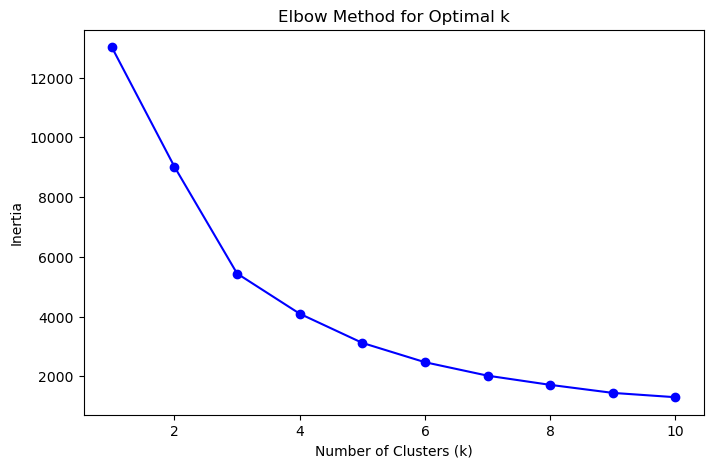

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
K = range (1,11)
for k in K :
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(rfm_scaled[['Recency','Frequency','Monetary']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K,inertia,'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [87]:
from sklearn.cluster import KMeans 
k=3
kmeans = KMeans(n_clusters=k,random_state =42)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm[['Recency','Frequency','Monetary']])
print(df_rfm.head())

   CustomerID  Recency  Frequency   Monetary  Cluster
0     14646.0        1         73  280206.02        2
1     18102.0        0         60  259657.30        2
2     17450.0        7         46  194390.79        2
3     16446.0        0          2  168472.50        2
4     14911.0        0        201  143711.17        1


In [89]:
import pandas as pd
cluster_means = df_rfm.groupby('Cluster').mean()
print(cluster_means)

           CustomerID    Recency  Frequency      Monetary
Cluster                                                  
0        15301.155953  91.941982   3.943374    1489.73978
1        14953.800000  35.960000  54.360000   62607.74280
2        16661.000000   2.000000  45.250000  225681.65250


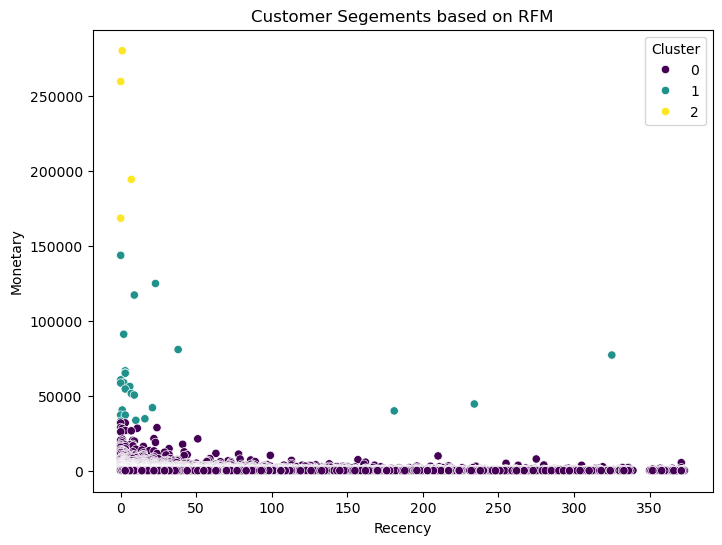

In [93]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_rfm['Recency'],y=df_rfm['Monetary'],hue=df_rfm['Cluster'],palette='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segements based on RFM')
plt.show()

In [97]:
cluster_labels ={
    0:"Low-Value Customers",
    1:"Regular Buyers",
    2:"High-Value Customer(VIPs)"
}
df_rfm['Segment']=df_rfm['Cluster'].map(cluster_labels)
print(df_rfm[['CustomerID','Recency','Frequency','Monetary','Segment']])

      CustomerID  Recency  Frequency   Monetary                    Segment
0        14646.0        1         73  280206.02  High-Value Customer(VIPs)
1        18102.0        0         60  259657.30  High-Value Customer(VIPs)
2        17450.0        7         46  194390.79  High-Value Customer(VIPs)
3        16446.0        0          2  168472.50  High-Value Customer(VIPs)
4        14911.0        0        201  143711.17             Regular Buyers
...          ...      ...        ...        ...                        ...
4333     16878.0       83          1      13.30        Low-Value Customers
4334     17956.0      248          1      12.75        Low-Value Customers
4335     16454.0       44          2       6.90        Low-Value Customers
4336     14792.0       63          1       6.20        Low-Value Customers
4337     16738.0      297          1       3.75        Low-Value Customers

[4338 rows x 5 columns]


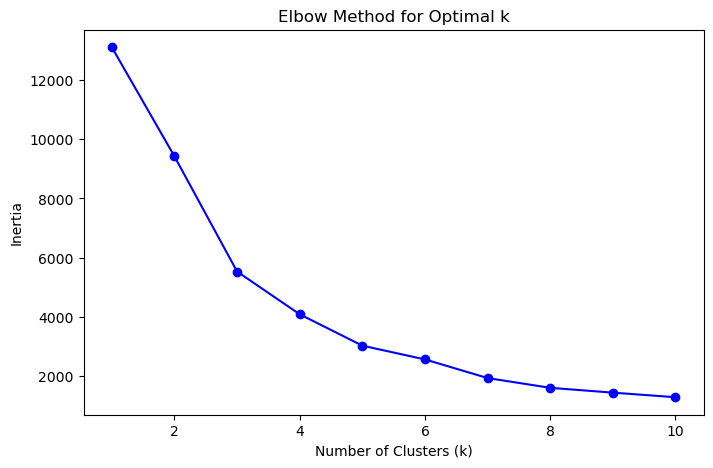

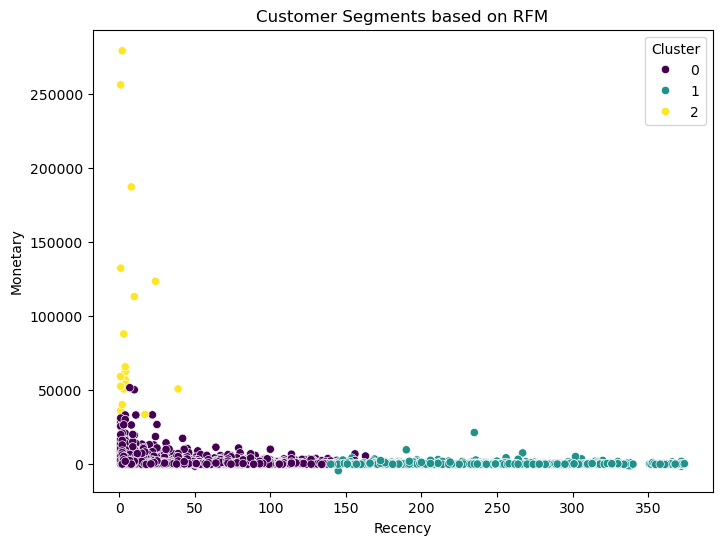

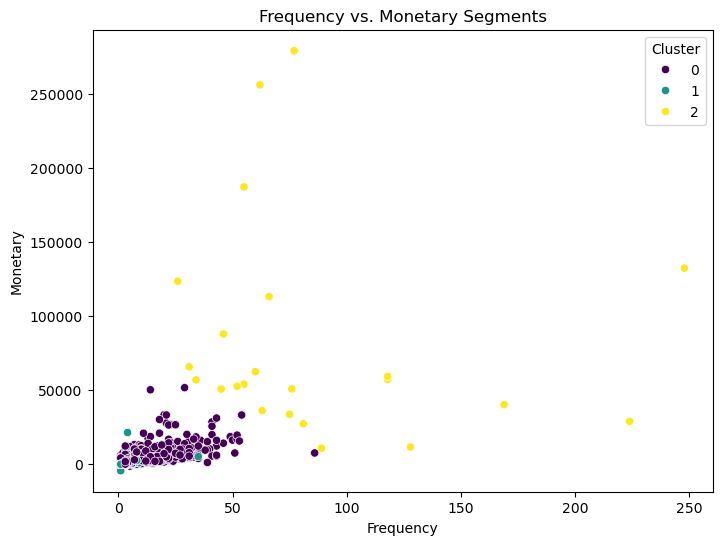

Cluster Summary:
            Recency  Frequency      Monetary
Cluster                                     
0         40.091245   5.595561   1821.839757
1        246.365611   1.846154    459.541105
2          6.086957  86.869565  81835.857391


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Data 
df = pd.read_excel(r"C:\Users\yoges\Downloads\Online Retail.xlsx",engine="openpyxl")

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Compute RFM Values
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': lambda x: (x * df.loc[x.index, 'UnitPrice']).sum()  # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Standardize Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Determine Optimal Clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means Clustering
optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on RFM')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs. Monetary Segments')
plt.show()

# Cluster Summary
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

print('Cluster Summary:')
print(cluster_summary)
